In [4]:
import numpy as np
import matplotlib.pyplot as plt

# --- 参数设置 ---
N0 = 400  # 匝数
I = 0.4   # 电流 (A)
R = 0.1   # 半径 (m)
mu0 = 4 * np.pi * 1e-7 # 磁导率 (H/m)

sensor_pos_cm = np.array([
    5.00, 6.00, 7.00, 8.00, 9.00, 10.00, 11.00, 12.00, 13.00, 14.00,
    15.00, 16.00, 17.00, 18.00, 19.00, 20.00, 21.00, 22.00, 23.00, 24.00, 25.00
])

# 轴向距离 (cm)，作为绘图的横坐标 x
# 对应表格中的 "轴向距离(cm)" 行，涵盖了从 -10 到 10 的完整区间
x_cm = np.array([
    -10.00, -9.00, -8.00, -7.00, -6.00, -5.00, -4.00, -3.00, -2.00, -1.00,
    0.00, 1.00, 2.00, 3.00, 4.00, 5.00, 6.00, 7.00, 8.00, 9.00, 10.00
])
x_m = x_cm * 1e-2 # 转换为 meters，用于理论公式计算

# 正向磁感应强度 (uT)
# 合并了两个表格的数据
B_pos_uT = np.array([
    361, 418, 478, 551, 628, 715, 798, 876, 939, 985,
    1002, 994, 954, 893, 814, 732, 645, 565, 490, 425, 367
])
B_pos_T = B_pos_uT * 1e-6 # 转换为 Tesla

# 反向磁感应强度 (uT)
# 合并了两个表格的数据
B_neg_uT = np.array([
    -332, -389, -454, -525, -605, -686, -776, -854, -925, -970,
    -986, -976, -937, -879, -804, -719, -636, -556, -481, -415, -360
])
B_neg_T = B_neg_uT * 1e-6 # 转换为 Tesla



 --- 数据处理 ---

 1. 计算平均磁感应强度 (B_T)

 为了使表格能够统一，我们使用正向和反向测量值对应的x坐标，但计算平均值时，我们需要将正负方向的x坐标统一到同一个列表，以便计算平均值
 注意：为了计算表格中的平均值，这里将正向和反向的数据分开计算，然后合并到表格中。
 但是，在计算理论值和绘制图表时，我们需要一个统一的x轴坐标。
 这里我们先处理表格中的平均值和相对误差。

In [8]:
# 统一x轴坐标（绝对值，用于理论计算和绘图）
# 我们注意到，表格中的“传感器所在位置”和“轴向距离”代表了同一个物理量（到中心的距离），但是正负号不同。
# 为了计算理论值，我们取绝对值，并将其对应到正向和负向的测量值。
# 为了表格的完整性，我们将使用传感器所在位置（正值）计算平均值和理论值。
x_abs_cm = x_cm
x_abs_m = x_cm * 1e-2

# 正向和反向数据点需要对应到其各自的x坐标
# 为了计算平均值，我们直接对正负磁感应强度进行算术平均。
# 如果需要对应到表格的“轴向距离”，则需要使用 x_neg_cm 来计算表格中的平均值。
# 这里我们先计算表格中的平均值，再统一处理用于理论计算和绘图。

# 平均磁感应强度 (uT)
B_avg_uT_raw = (B_pos_uT + np.abs(B_neg_uT)) / 2
# 四舍五入到整数 (用于填表)
B_avg_uT = np.round(B_avg_uT_raw).astype(int)

# 统一使用正向的 x 坐标 (cm) 来计算理论值和绘制图表
# 后续的变量映射（确保兼容原有的后续代码）
x_for_theory_and_plot_cm = x_cm
x_for_theory_and_plot_m = x_m

# 2. 计算理论磁感应强度 (B_theory_T)
# 注意：公式中的 X 是距离圆心的距离，所以使用绝对值。
B_theory_T = (mu0 * N0 * I * R**2) / (2 * (R**2 + x_m**2)**(3/2))
B_theory_uT_raw = B_theory_T * 1e6 # 转换为 uT
# 四舍五入到整数 (用于填表)
B_theory_uT = np.round(B_theory_uT_raw).astype(int)

# 3. 计算相对误差 (%)
# 相对误差 = |实验值 - 理论值| / 理论值 * 100%
# 这里使用平均磁感应强度作为实验值
relative_error_uT = np.abs(B_avg_uT - B_theory_uT) / B_theory_uT * 100
# 为了避免除以零，如果理论值为0，相对误差可以设为NaN或0
# 在本实验中，理论值不会为0，所以直接计算。

# --- 输出结果 ---
print("--- 数据处理结果 ---")
print("参数: N0={}, I={}, R={}, mu0={}".format(N0, I, R, mu0))
print("\n平均磁感应强度 B (uT):")
print(B_avg_uT)
print("\n理论磁感应强度 Bx (uT):")
print(B_theory_uT)
print("\n相对误差 (%)")
print(np.round(relative_error_uT, 2))

--- 数据处理结果 ---
参数: N0=400, I=0.4, R=0.1, mu0=1.2566370614359173e-06

平均磁感应强度 B (uT):
[346 404 466 538 616 700 787 865 932 978 994 985 946 886 809 726 640 560
 486 420 364]

理论磁感应强度 Bx (uT):
[ 355  413  479  553  634  719  805  883  948  990 1005  990  948  883
  805  719  634  553  479  413  355]

相对误差 (%)
[2.54 2.18 2.71 2.71 2.84 2.64 2.24 2.04 1.69 1.21 1.09 0.51 0.21 0.34
 0.5  0.97 0.95 1.27 1.46 1.69 2.54]


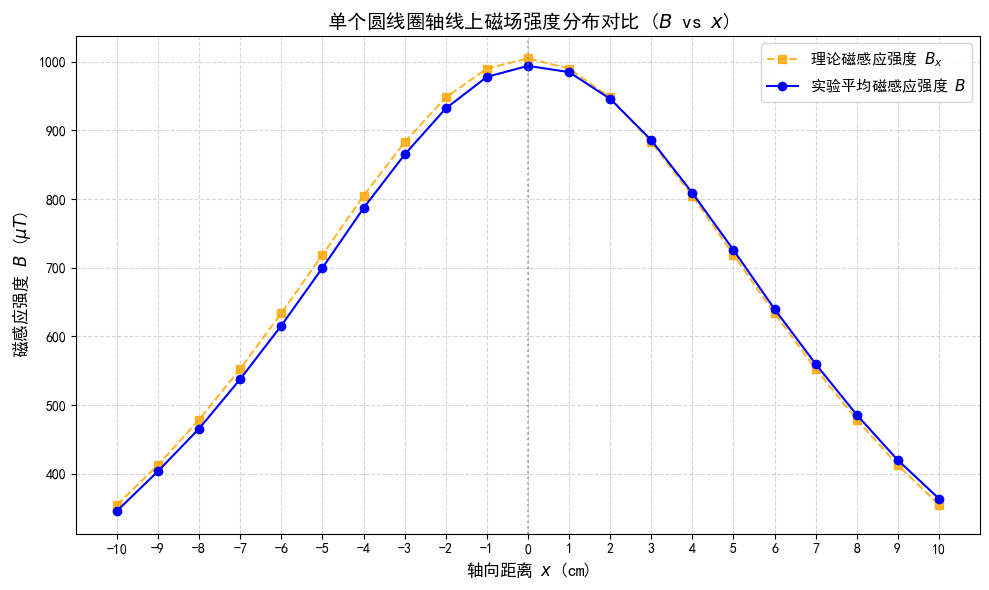

In [10]:
# %% [code] 绘图代码
import matplotlib.pyplot as plt

# --- 设置字体以支持中文显示 ---
# Windows/Linux通常可以使用 SimHei, Mac可能需要 Heiti TC 或 Arial Unicode MS
# 如果代码报错找不到字体，可以尝试注释掉这两行，或者换成系统里有的其他中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# --- 绘图 ---
plt.figure(figsize=(10, 6), dpi=100) # 设置画布大小和清晰度

# 1. 绘制理论磁感应强度 Bx (使用虚线+方块标记)
# 为了让理论曲线更平滑，这里我们也可以选择只画线不画点，
# 但为了对应具体的测量点，这里保留标记
plt.plot(x_cm, B_theory_uT,
         color='orange', linestyle='--', marker='s', markersize=6, alpha=0.8,
         label='理论磁感应强度 $B_x$')

# 2. 绘制实验平均磁感应强度 B (使用实线+圆点标记)
plt.plot(x_cm, B_avg_uT,
         color='blue', linestyle='-', marker='o', markersize=6,
         label='实验平均磁感应强度 $B$')

# --- 图表修饰 ---
# 设置标题
plt.title('单个圆线圈轴线上磁场强度分布对比 ($B$ vs $x$)', fontsize=14)

# 设置横纵轴标签
plt.xlabel('轴向距离 $x$ (cm)', fontsize=12)
plt.ylabel('磁感应强度 $B$ ($\mu T$)', fontsize=12)

# 设置坐标轴刻度范围 (根据数据自动调整，稍微留点边距)
plt.xlim(min(x_cm) - 1, max(x_cm) + 1)
# 设置x轴刻度间隔 (例如每1cm一个刻度)
plt.xticks(x_cm)

# 添加图例
plt.legend(loc='best', fontsize=11)

# 添加网格 (便于读数)
plt.grid(True, linestyle='--', alpha=0.5)

# 在中心点 (x=0) 添加一条竖直参考线
plt.axvline(x=0, color='gray', linestyle=':', alpha=0.6)

# 显示图表
plt.tight_layout()
plt.show()

#测绘单个圆线圈径向磁场

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# --- 实验数据录入 ---
# 径向距离 y (cm)
y_cm = np.array([-5.00, -4.00, -3.00, -2.00, -1.00, 0.00, 1.00, 2.00, 3.00, 4.00, 5.00])

# 正向磁感应强度 (uT)
B_rad_pos = np.array([1235, 1140, 1076, 1038, 1013, 1008, 1017, 1043, 1088, 1161, 1269])

# 反向磁感应强度 (uT)
B_rad_neg = np.array([-1208, -1110, -1046, -1008, -984, -975, -985, -1012, -1051, -1124, -1230])

# --- 数据处理 ---
# 1. 计算平均磁感应强度
# 公式：(正向 + |反向|) / 2
B_rad_avg_raw = (B_rad_pos + np.abs(B_rad_neg)) / 2

# 2. 四舍五入到整数
B_rad_avg = np.round(B_rad_avg_raw).astype(int)

# --- 输出结果 ---
print("--- 实验二：单个圆线圈径向磁场强度数据处理结果 ---")
print("径向距离 y (cm):")
print(y_cm)
print("\n[表格填空项] 平均磁感应强度 B (uT):")
print(B_rad_avg)

--- 实验二：单个圆线圈径向磁场强度数据处理结果 ---
径向距离 y (cm):
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]

[表格填空项] 平均磁感应强度 B (uT):
[1222 1125 1061 1023  998  992 1001 1028 1070 1142 1250]


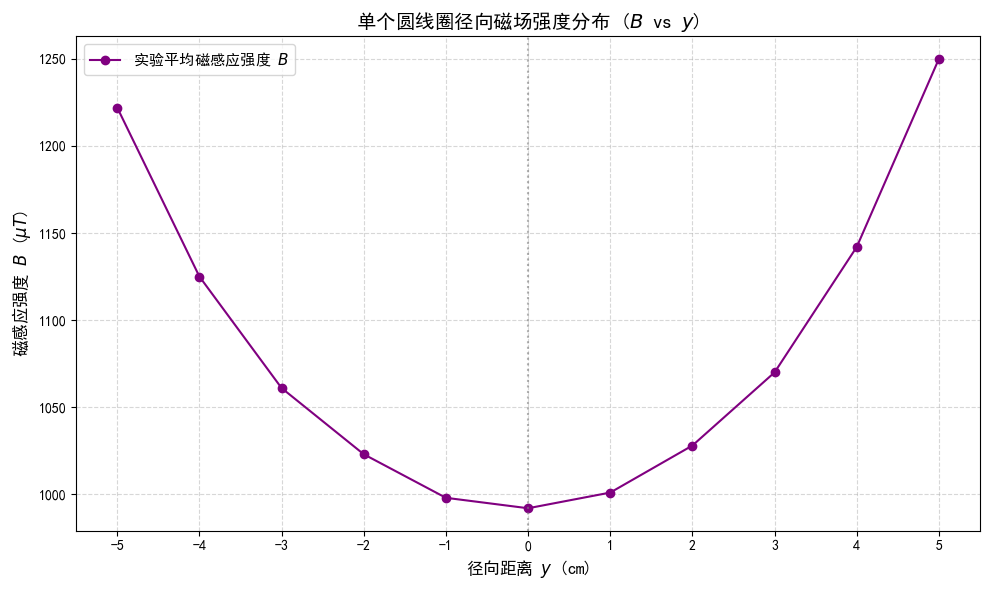

In [12]:
# --- 绘图设置 ---
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.figure(figsize=(10, 6), dpi=100)

# --- 绘制曲线 ---
# 使用计算出的平均值进行绘图
plt.plot(y_cm, B_rad_avg,
         color='purple', linestyle='-', marker='o', markersize=6,
         label='实验平均磁感应强度 $B$')

# --- 图表修饰 ---
plt.title('单个圆线圈径向磁场强度分布 ($B$ vs $y$)', fontsize=14)
plt.xlabel('径向距离 $y$ (cm)', fontsize=12)
plt.ylabel('磁感应强度 $B$ ($\mu T$)', fontsize=12)

# 设置图例
plt.legend(loc='best', fontsize=11)

# 设置网格
plt.grid(True, linestyle='--', alpha=0.5)

# 设置横轴刻度 (让每个数据点都有刻度显示)
plt.xticks(y_cm)

# 添加中心参考线
plt.axvline(x=0, color='gray', linestyle=':', alpha=0.6)

# 显示图表
plt.tight_layout()
plt.show()

测绘亥姆霍兹线圈的轴向磁场强度分布

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# --- 实验数据录入 ---

# 轴向距离 x (cm) - 从 -10 到 10
x_cm = np.arange(-10, 11, 1) # 生成 -10 到 10 的数组

# 正向磁感应强度 (uT) - 合并两表数据
B_pos = np.array([
    876, 983, 1094, 1190, 1276, 1341, 1388, 1408, 1424, 1423,  # 第一张表 (-10 到 -1)
    1423, 1422, 1423, 1412, 1390, 1350, 1290, 1209, 1114, 1006, 894 # 第二张表 (0 到 10)
])

# 反向磁感应强度 (uT) - 合并两表数据
B_neg = np.array([
    -880, -988, -1093, -1196, -1279, -1348, -1389, -1418, -1425, -1435, # 第一张表
    -1432, -1433, -1428, -1420, -1401, -1358, -1295, -1216, -1115, -1010, -900 # 第二张表
])

# --- 数据处理 ---
# 1. 计算平均磁感应强度
# 公式：(正向 + |反向|) / 2
B_avg_raw = (B_pos + np.abs(B_neg)) / 2

# 2. 四舍五入到整数
B_avg = np.round(B_avg_raw).astype(int)

# --- 输出结果 ---
print("--- 实验三：亥姆霍兹线圈轴向磁场强度数据处理结果 ---")
print("轴向距离 x (cm):")
print(x_cm)
print("\n[表格填空项] 平均磁感应强度 B (uT):")
print(B_avg)

--- 实验三：亥姆霍兹线圈轴向磁场强度数据处理结果 ---
轴向距离 x (cm):
[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]

[表格填空项] 平均磁感应强度 B (uT):
[ 878  986 1094 1193 1278 1344 1388 1413 1424 1429 1428 1428 1426 1416
 1396 1354 1292 1212 1114 1008  897]


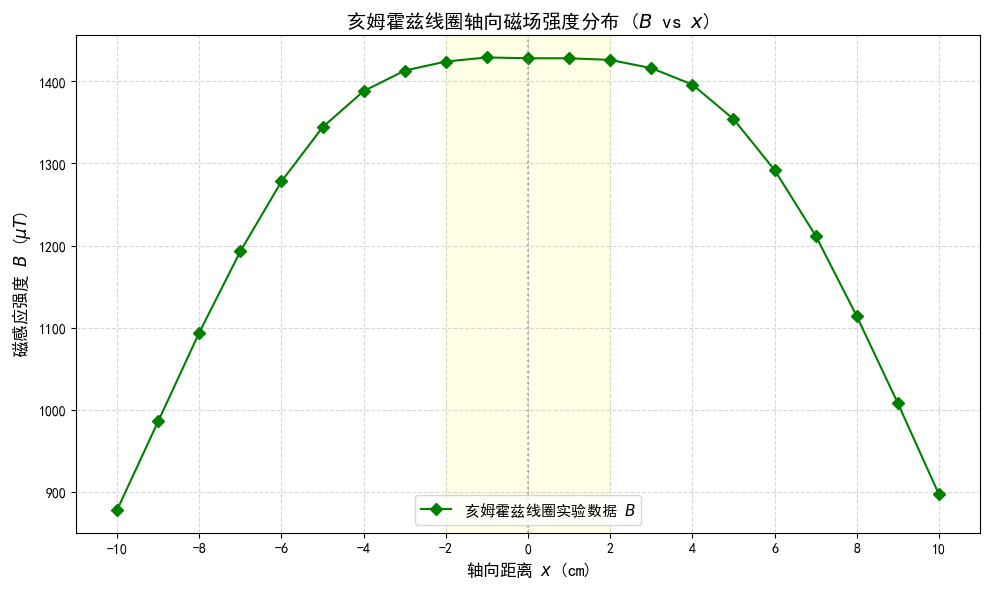

In [14]:
# --- 绘图设置 ---
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.figure(figsize=(10, 6), dpi=100)

# --- 绘制曲线 ---
plt.plot(x_cm, B_avg,
         color='green', linestyle='-', marker='D', markersize=6,
         label='亥姆霍兹线圈实验数据 $B$')

# --- 图表修饰 ---
plt.title('亥姆霍兹线圈轴向磁场强度分布 ($B$ vs $x$)', fontsize=14)
plt.xlabel('轴向距离 $x$ (cm)', fontsize=12)
plt.ylabel('磁感应强度 $B$ ($\mu T$)', fontsize=12)

# 设置坐标轴范围
plt.xlim(-11, 11)
# 设置x轴刻度
plt.xticks(np.arange(-10, 11, 2)) # 每2cm显示一个刻度，避免太拥挤

# 添加图例
plt.legend(loc='lower center', fontsize=11)

# 添加网格
plt.grid(True, linestyle='--', alpha=0.5)

# 添加中心参考线
plt.axvline(x=0, color='gray', linestyle=':', alpha=0.6)

# (可选) 标注匀强磁场区域
# 亥姆霍兹线圈通常在 R/2 范围内比较均匀，即 -5cm 到 5cm
plt.axvspan(-2, 2, color='yellow', alpha=0.1, label='匀强磁场区域示意')

# 显示图表
plt.tight_layout()
plt.show()